In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import re

# Conecto a base de datos
conn = sql.connect('jugadores.db')

# Cargar los dataframes
df_mbappe = pd.read_sql_query('SELECT * FROM mbappe', conn)

df_haaland = pd.read_sql_query('SELECT * FROM haaland', conn)

conn.close()

In [2]:
# Verifica las columnas disponibles
print(df_mbappe.columns)
print(df_haaland.columns)

Index(['id', 'club', 'temporada', 'partidos_liga', 'goles_liga',
       'asistencias_liga', 'partidos_copa', 'goles_copa', 'asistencias_copa',
       'partidos_internacional', 'goles_internacional',
       'asistencias_internacional', 'partidos_total', 'goles_total',
       'asistencias_total', 'media_goleadora', 'edad'],
      dtype='object')
Index(['id', 'club', 'temporada', 'partidos_liga', 'goles_liga',
       'asistencias_liga', 'partidos_copa', 'goles_copa', 'asistencias_copa',
       'partidos_internacional', 'goles_internacional',
       'asistencias_internacional', 'partidos_total', 'goles_total',
       'asistencias_total', 'media_goleadora', 'edad'],
      dtype='object')


In [3]:
# Verificar la distribución de edades en ambos DataFrames
print(df_mbappe['temporada'].unique())
print(df_haaland['temporada'].unique())

['2015-16' '2016-17' '2017-18' 'Total club' '2018-19' '2019-20' '2020-21'
 '2021-22' '2022-23' '2023-24' '2024-25' 'Total carrera']
['2017-18' 'Total club' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23'
 '2023-24' '2024-25' 'Total carrera']


In [4]:
# Eliminar filas con NaN en la columna 'edad' o 'goles' para ambos DataFrames
df_mbappe_clean = df_mbappe.dropna(subset=['temporada', 'goles_total'])
df_haaland_clean = df_haaland.dropna(subset=['temporada', 'goles_total'])

In [5]:
# Verificar que no hay NaN en DataFrames limpios
print(df_mbappe_clean['temporada'].unique())
print(df_haaland_clean['temporada'].unique())

['2015-16' '2016-17' '2017-18' 'Total club' '2018-19' '2019-20' '2020-21'
 '2021-22' '2022-23' '2023-24' '2024-25' 'Total carrera']
['2017-18' 'Total club' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23'
 '2023-24' '2024-25' 'Total carrera']


In [8]:
# Filtrar las temporadas que finalicen en un dígito (0-9) usando una expresión regular
df_mbappe_clean = df_mbappe_clean[df_mbappe_clean['temporada'].str.match(r'.*\d$')]
df_haaland_clean = df_haaland_clean[df_haaland_clean['temporada'].str.match(r'.*\d$')]
print(df_mbappe_clean['temporada'].unique())
print(df_haaland_clean['temporada'].unique())

['2015-16' '2016-17' '2017-18' '2018-19' '2019-20' '2020-21' '2021-22'
 '2022-23' '2023-24' '2024-25']
['2017-18' '2018-19' '2019-20' '2020-21' '2021-22' '2022-23' '2023-24'
 '2024-25']


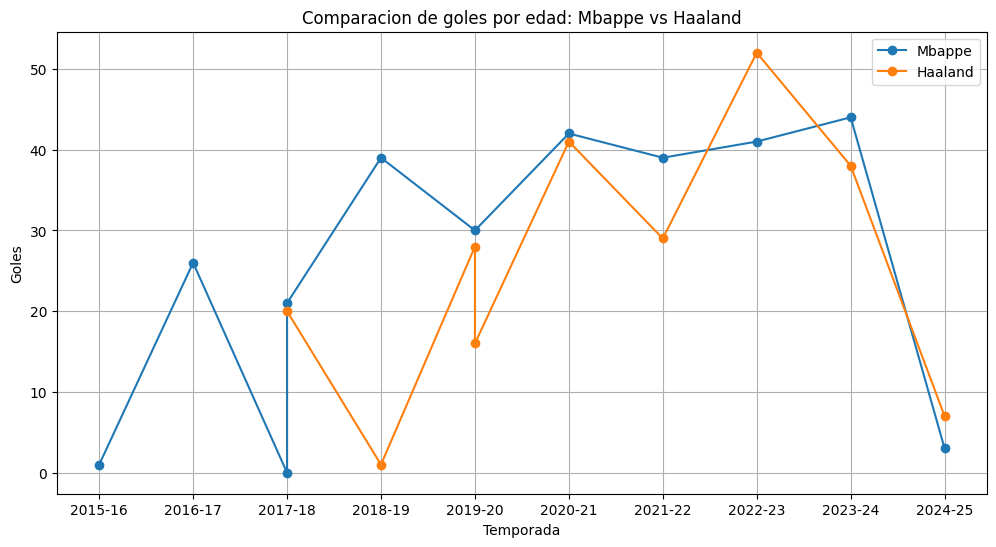

In [9]:
'''Graficar los goles por edad usando matplotlib'''

# Crear la figura de los ejes
plt.figure(figsize=(12, 6))

# Graficar goles por edad para cr7
plt.plot(df_mbappe_clean['temporada'], df_mbappe_clean['goles_total'], label='Mbappe', marker='o')

# Graficar goles por edad para messi
plt.plot(df_haaland_clean['temporada'], df_haaland_clean['goles_total'], label='Haaland', marker='o')

# Ajustar el intervalo de ticks en el eje X para mostrar cada edad
# plt.xticks(df_messi_clean['edad'].unique())
# plt.xticks(df_cristiano_clean['edad'].unique())

# Combinar las edades únicas de ambos DataFrames
edades_unicas = sorted(set(df_mbappe_clean['temporada'].unique()).union(set(df_haaland_clean['temporada'].unique())))

# Ajustar el intervalo de ticks en el eje X para mostrar todas las edades
plt.xticks(edades_unicas)


# Titulos y etiquetas
plt.title('Comparacion de goles por edad: Mbappe vs Haaland')
plt.xlabel('Temporada')
plt.ylabel('Goles')
plt.legend()

# Mostrar grafica
plt.grid(True)
plt.show()

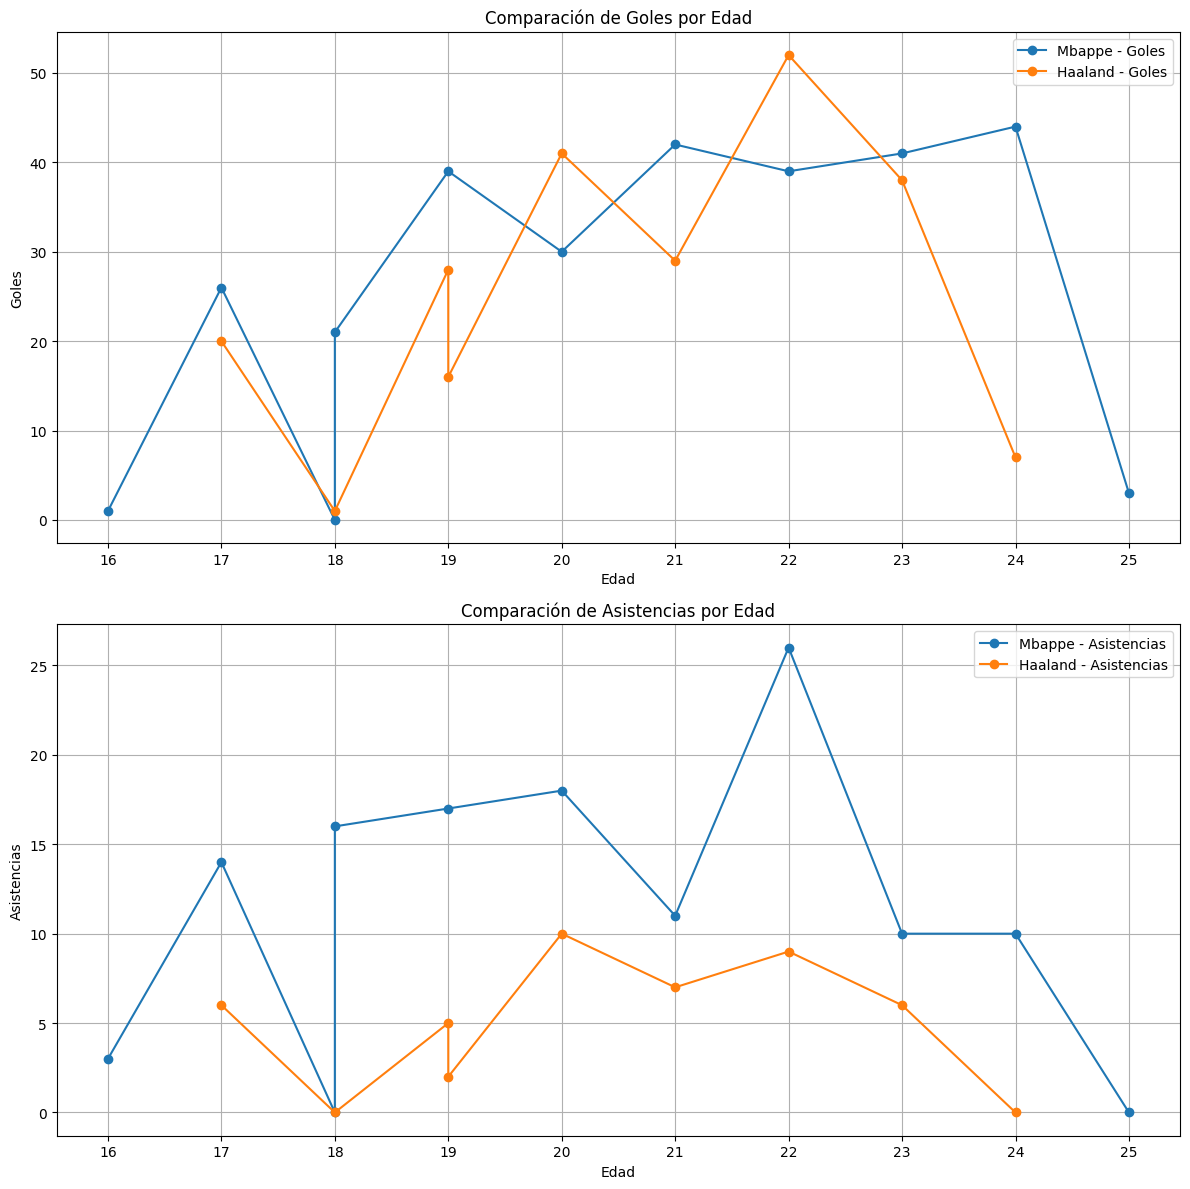

In [7]:
# Crear la figura y los subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Subplot 1: Goles por edad
ax[0].plot(df_mbappe_clean['edad'], df_mbappe_clean['goles_total'], label='Mbappe - Goles', marker='o')
ax[0].plot(df_haaland_clean['edad'], df_haaland_clean['goles_total'], label='Haaland - Goles', marker='o')
ax[0].set_title('Comparación de Goles por Edad')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Goles')
ax[0].legend()
ax[0].grid(True)

# Subplot 2: Asistencias por edad
ax[1].plot(df_mbappe_clean['edad'], df_mbappe_clean['asistencias_total'], label='Mbappe - Asistencias', marker='o')
ax[1].plot(df_haaland_clean['edad'], df_haaland_clean['asistencias_total'], label='Haaland - Asistencias', marker='o')
ax[1].set_title('Comparación de Asistencias por Edad')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Asistencias')
ax[1].legend()
ax[1].grid(True)

# Ajustar el intervalo de ticks en el eje X para mostrar todas las edades
edades_unicas = sorted(set(df_mbappe_clean['edad'].unique()).union(set(df_haaland_clean['edad'].unique())))
ax[0].set_xticks(edades_unicas)
ax[1].set_xticks(edades_unicas)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

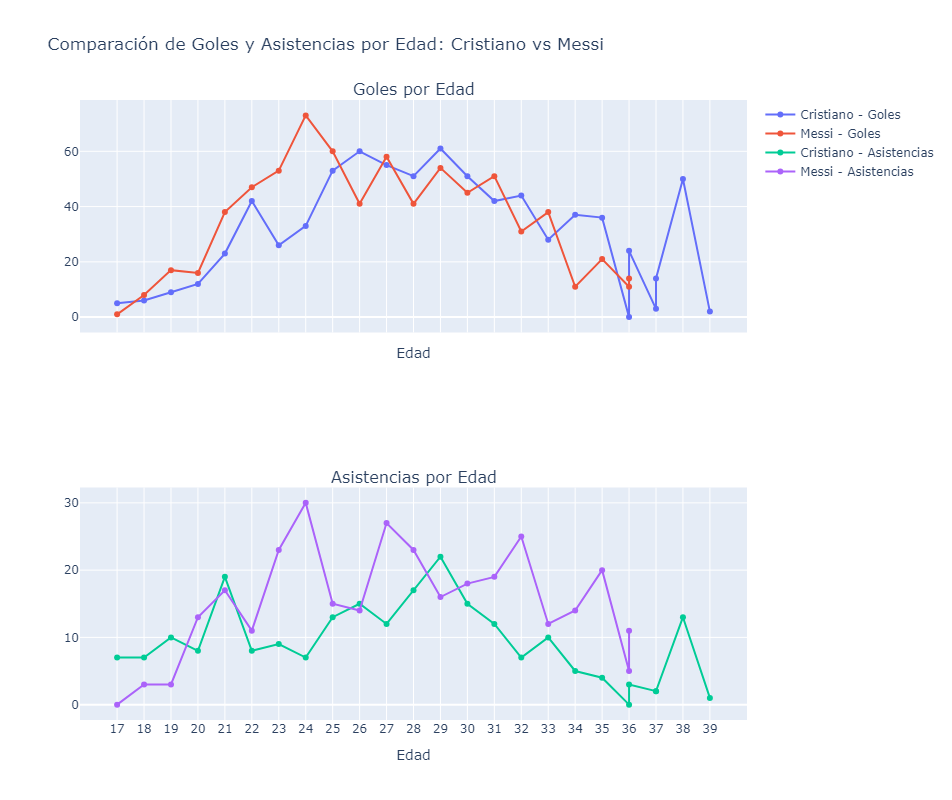

In [15]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Crear una figura con subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Goles por Edad", "Asistencias por Edad"))

# Agregar la traza para los goles de Ronaldo
fig.add_trace(go.Scatter(x=df_cristiano_clean['edad'], y=df_cristiano_clean['goles_total'],
                         mode='lines+markers', name='Cristiano - Goles'),
              row=1, col=1)

# Agregar la traza para los goles de Messi
fig.add_trace(go.Scatter(x=df_messi_clean['edad'], y=df_messi_clean['goles_total'],
                         mode='lines+markers', name='Messi - Goles'),
              row=1, col=1)

# Agregar la traza para las asistencias de Ronaldo
fig.add_trace(go.Scatter(x=df_cristiano_clean['edad'], y=df_cristiano_clean['asistencias_total'],
                         mode='lines+markers', name='Cristiano - Asistencias'),
              row=2, col=1)

# Agregar la traza para las asistencias de Messi
fig.add_trace(go.Scatter(x=df_messi_clean['edad'], y=df_messi_clean['asistencias_total'],
                         mode='lines+markers', name='Messi - Asistencias'),
              row=2, col=1)

# Combinar las edades únicas de ambos DataFrames
edades_unicas = sorted(set(df_cristiano_clean['edad'].unique()).union(set(df_messi_clean['edad'].unique())))

# Actualizar layout, incluyendo los ticks del eje X
fig.update_layout(
    title_text="Comparación de Goles y Asistencias por Edad: Cristiano vs Messi",
    height=800,
    xaxis=dict(
        tickmode='array',
        tickvals=edades_unicas,
        title='Edad'
    ),
    xaxis2=dict(
        tickmode='array',
        tickvals=edades_unicas,
        title='Edad'
    )
)

# Mostrar la gráfica
fig.show()

In [ ]:
'''
# Crear la figura y los subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Subplot 1: Goles por edad
ax[0].plot(df_ronaldo_clean['edad'], df_ronaldo_clean['goles'], label='Cristiano Ronaldo - Goles', marker='o')
ax[0].plot(df_messi_clean['edad'], df_messi_clean['goles'], label='Lionel Messi - Goles', marker='o')
ax[0].set_title('Comparación de Goles por Edad')
ax[0].set_xlabel('Edad')
ax[0].set_ylabel('Goles')
ax[0].legend()
ax[0].grid(True)

# Subplot 2: Asistencias por edad
ax[1].plot(df_ronaldo_clean['edad'], df_ronaldo_clean['asistencias'], label='Cristiano Ronaldo - Asistencias', marker='o')
ax[1].plot(df_messi_clean['edad'], df_messi_clean['asistencias'], label='Lionel Messi - Asistencias', marker='o')
ax[1].set_title('Comparación de Asistencias por Edad')
ax[1].set_xlabel('Edad')
ax[1].set_ylabel('Asistencias')
ax[1].legend()
ax[1].grid(True)

# Ajustar el intervalo de ticks en el eje X para mostrar todas las edades
edades_unicas = sorted(set(df_ronaldo_clean['edad'].unique()).union(set(df_messi_clean['edad'].unique())))
ax[0].set_xticks(edades_unicas)
ax[1].set_xticks(edades_unicas)

# Mostrar la gráfica
plt.tight_layout()
plt.show()
/////////////////////////////
La sintaxis fig, ax = plt.subplots(2, 1, figsize=(12, 12)) es parte de la biblioteca MATPLOTLIB 
y se utiliza para crear múltiples subgráficos dentro de una sola figura.
Aquí te explico cada parte de esta sintaxis:

Desglose de la Sintaxis
plt.subplots(2, 1, figsize=(12, 12)):

plt.subplots(): Es una función que crea una figura y una cuadrícula de subgráficos en ella.

(2, 1): Define la disposición de los subgráficos.

2: Significa que habrá dos filas de subgráficos.

1: Significa que habrá una columna de subgráficos.

figsize=(12, 12): Especifica el tamaño total de la figura en pulgadas (ancho y alto).

Aquí, la figura tendrá un tamaño de 12 pulgadas de ancho y 12 pulgadas de alto.
fig, ax:

fig: Es el objeto de la figura principal que contiene los subgráficos.

ax: Es un objeto o una matriz de objetos que representa los ejes de los subgráficos creados.

Si creas varios subgráficos, ax será una matriz (en este caso, una lista de dos elementos porque hay dos subgráficos).

Puedes acceder a cada subgráfico usando ax[0] para el primer subgráfico y ax[1] para el segundo subgráfico.'''

In [ ]:
'''
# Actualizar layout, incluyendo los ticks del eje X
fig.update_layout(
    title_text="Comparación de Goles y Asistencias por Edad: Cristiano Ronaldo vs Lionel Messi",
    height=800,
    xaxis=dict(
        tickmode='array',
        tickvals=edades_unicas,
        title='Edad'
    ),
    xaxis2=dict(
        tickmode='array',
        tickvals=edades_unicas,
        title='Edad'
    )
)

Desglose de la Sintaxis

fig.update_layout():
Esta función de plotly se utiliza para actualizar el diseño (layout) de una figura PLOTLY.

Aquí se configuran diversos aspectos de la apariencia y comportamiento de la gráfica.

title_text="Comparación de Goles y Asistencias por Edad: Cristiano Ronaldo vs Lionel Messi":
Define el título principal de la gráfica.
Este título aparecerá en la parte superior de la figura y describe el contenido de la gráfica.

height=800:
Establece la altura total de la figura en píxeles. En este caso, la altura es de 800 píxeles.

xaxis=dict(...) y xaxis2=dict(...):
Estas líneas configuran las propiedades del eje X para los dos subgráficos (recuerda que estamos usando subplots).
xaxis: Configura el eje X del primer subplot.
xaxis2: Configura el eje X del segundo subplot.


Configuración del Eje X
Dentro de cada dict (xaxis y xaxis2), se configuran varias propiedades específicas del eje X:

tickmode='array':
Define cómo se mostrarán los ticks (marcas) en el eje X.
'array' significa que las marcas en el eje X se especificarán manualmente usando un arreglo o lista de valores.

tickvals=edades_unicas:
Especifica los valores exactos donde se colocarán las marcas en el eje X.
edades_unicas es una lista que contiene todas las edades únicas de los jugadores (Ronaldo y Messi).
Esto asegura que solo se muestren en el eje X las edades que realmente existen en los datos.

title='Edad':
Establece el título del eje X, que aparecerá justo debajo de dicho eje.
En este caso, se titula "Edad", ya que el eje X representa las edades de los jugadores.
'''